## 충청남도, 197043
## 데이터 전처리
1. 필요없는 컬럼 빼기
2. region_sub 컬럼 원핫인코딩 형식 수정
3. 컬럼별 상관관계 파악 컬럼 제거
4. price_cat 컬럼 추가

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

region_name = 'ccn_region'

In [2]:
readD = pd.read_csv(f'region-data-files/{region_name}.csv')
readD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197043 entries, 0 to 197042
Columns: 105 entries, region to all_loan
dtypes: float64(72), int64(26), object(7)
memory usage: 157.8+ MB


In [3]:
all_col = {
    'region', 'region_sub', 'apt_name', 'apt_size', 'apt_floor', 'contract_date', 'contract_price',
    'completion_year', 'period_completed', 'pyung', 'price_per_pyung', 'contract_year', 'value_year',
    'value_factor', 'price_per_pyung_present', 'contract_date_key', 'index',  'date_ym', 'kospi',
    'kospi200', 'kospi200construct', 'kosdaq', 'dowjones', 's&p500', 'shanghai', 'nikkei',
    'exchange_rate', 'gold', 'oil', 'export', 'import', 'cpi_living', 'cpi', 'ccsi',
    'loan_interest_rate', 'housing_loan_rate',
    
    'gw_ratio', 'gg_ratio', 'gsn_ratio', 'gsb_ratio', 'gj_ratio', 'dg_ratio', 'dj_ratio',
    'bs_ratio', 'so_ratio', 'sj_ratio', 'us_ratio', 'ic_ratio', 'jrn_ratio', 'jrb_ratio',
    'jj_ratio', 'ccn_ratio', 'ccb_ratio', 'all_ratio',
    
    'gw_pop', 'gg_pop', 'gsn_pop', 'gsb_pop', 'gj_pop', 'dg_pop', 'dj_pop', 'bs_pop',
    'so_pop', 'sj_pop', 'us_pop', 'ic_pop', 'jrn_pop', 'jrb_pop', 'jj_pop', 'ccn_pop', 'ccb_pop',
    
    'all_re_ccsi', 'so_re_ccsi', 'ic_re_ccsi', 'gg_re_ccsi', 'bs_re_ccsi', 'dg_re_ccsi',
    'gj_re_ccsi', 'dj_re_ccsi', 'us_re_ccsi', 'gw_re_ccsi', 'ccb_re_ccsi', 'ccn_re_ccsi',
    'jrb_re_ccsi', 'jrn_re_ccsi', 'gsb_re_ccsi', 'gsn_re_ccsi',
    
    'gw_loan', 'gg_loan', 'gsn_loan', 'gsb_loan', 'gj_loan', 'dg_loan', 'dj_loan',
    'bs_loan', 'so_loan', 'sj_loan', 'us_loan', 'ic_loan', 'jrn_loan', 'jrb_loan',
    'jj_loan', 'ccn_loan', 'ccb_loan', 'all_loan'
}

In [4]:
drop_col_1 = {
    'region', 'apt_name', 'apt_size', 'contract_date', 'contract_price',
    'completion_year', 'price_per_pyung', 'contract_year', 'value_year',
    'value_factor', 'contract_date_key', 'index', 'date_ym', 'kospi',
    's&p500', 'nikkei', 'cpi', 'ccsi', 'housing_loan_rate',
    
    'gw_ratio', 'gg_ratio', 'gsn_ratio', 'gsb_ratio', 'gj_ratio', 'dg_ratio', 'dj_ratio',
    'bs_ratio', 'so_ratio', 'sj_ratio', 'us_ratio', 'ic_ratio', 'jrn_ratio', 'jrb_ratio',
    'jj_ratio', 'ccn_ratio', 'ccb_ratio', 'all_ratio',
    
    'gw_pop', 'gg_pop', 'gsn_pop', 'gsb_pop', 'gj_pop', 'dg_pop', 'bs_pop',
    'so_pop', 'us_pop', 'ic_pop', 'jrn_pop', 'jj_pop',
    
    'all_re_ccsi', 'so_re_ccsi', 'ic_re_ccsi', 'gg_re_ccsi', 'bs_re_ccsi', 'dg_re_ccsi',
    'gj_re_ccsi', 'dj_re_ccsi', 'us_re_ccsi', 'gw_re_ccsi', 'ccb_re_ccsi',
    'jrb_re_ccsi', 'jrn_re_ccsi', 'gsb_re_ccsi', 'gsn_re_ccsi',
    
    'gw_loan', 'gg_loan', 'gsn_loan', 'gsb_loan', 'gj_loan', 'dg_loan', 'dj_loan',
    'bs_loan', 'so_loan', 'sj_loan', 'us_loan', 'ic_loan', 'jrn_loan', 'jrb_loan',
    'jj_loan', 'ccb_loan', 'all_loan'
}

In [5]:
preD = readD.drop(columns=drop_col_1)
preD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197043 entries, 0 to 197042
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region_sub               197043 non-null  object 
 1   apt_floor                197043 non-null  int64  
 2   period_completed         197043 non-null  int64  
 3   pyung                    197043 non-null  float64
 4   price_per_pyung_present  197043 non-null  float64
 5   kospi200                 197043 non-null  float64
 6   kospi200construct        197043 non-null  float64
 7   kosdaq                   197043 non-null  float64
 8   dowjones                 197043 non-null  float64
 9   shanghai                 197043 non-null  float64
 10  exchange_rate            197043 non-null  float64
 11  gold                     197043 non-null  float64
 12  oil                      197043 non-null  float64
 13  export                   197043 non-null  int64  
 14  impo

In [6]:
# test = preD['region_sub'].str.split(expand=True)[0]
# test.value_counts()

preD['region_sub'] = preD['region_sub'].str.split(expand=True)[0]
preD['region_sub'].value_counts()

천안서북구    51678
아산시      39987
천안동남구    31430
당진시      17471
서산시      14589
공주시       7220
계룡시       6316
홍성군       5606
논산시       5515
보령시       4941
예산군       4178
태안군       2745
금산군       2302
서천군       1308
부여군       1235
청양군        522
Name: region_sub, dtype: int64

In [7]:
drop_col_2 = {
    'dj_pop'
}

preD.drop(columns=drop_col_2, inplace=True)
preD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197043 entries, 0 to 197042
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region_sub               197043 non-null  object 
 1   apt_floor                197043 non-null  int64  
 2   period_completed         197043 non-null  int64  
 3   pyung                    197043 non-null  float64
 4   price_per_pyung_present  197043 non-null  float64
 5   kospi200                 197043 non-null  float64
 6   kospi200construct        197043 non-null  float64
 7   kosdaq                   197043 non-null  float64
 8   dowjones                 197043 non-null  float64
 9   shanghai                 197043 non-null  float64
 10  exchange_rate            197043 non-null  float64
 11  gold                     197043 non-null  float64
 12  oil                      197043 non-null  float64
 13  export                   197043 non-null  int64  
 14  impo

In [8]:
corr_matrix = preD.corr()
corr_matrix["price_per_pyung_present"].sort_values(ascending=False)

price_per_pyung_present    1.000000
apt_floor                  0.315465
pyung                      0.236832
dowjones                   0.090941
sj_pop                     0.082583
cpi_living                 0.079950
ccb_pop                    0.077894
exchange_rate              0.076046
ccn_loan                   0.072082
ccn_pop                    0.071644
gold                       0.046299
kosdaq                     0.023699
shanghai                   0.022612
kospi200                  -0.000062
ccn_re_ccsi               -0.000567
import                    -0.028691
oil                       -0.052595
export                    -0.059777
kospi200construct         -0.087518
loan_interest_rate        -0.098513
jrb_pop                   -0.110827
period_completed          -0.596043
Name: price_per_pyung_present, dtype: float64

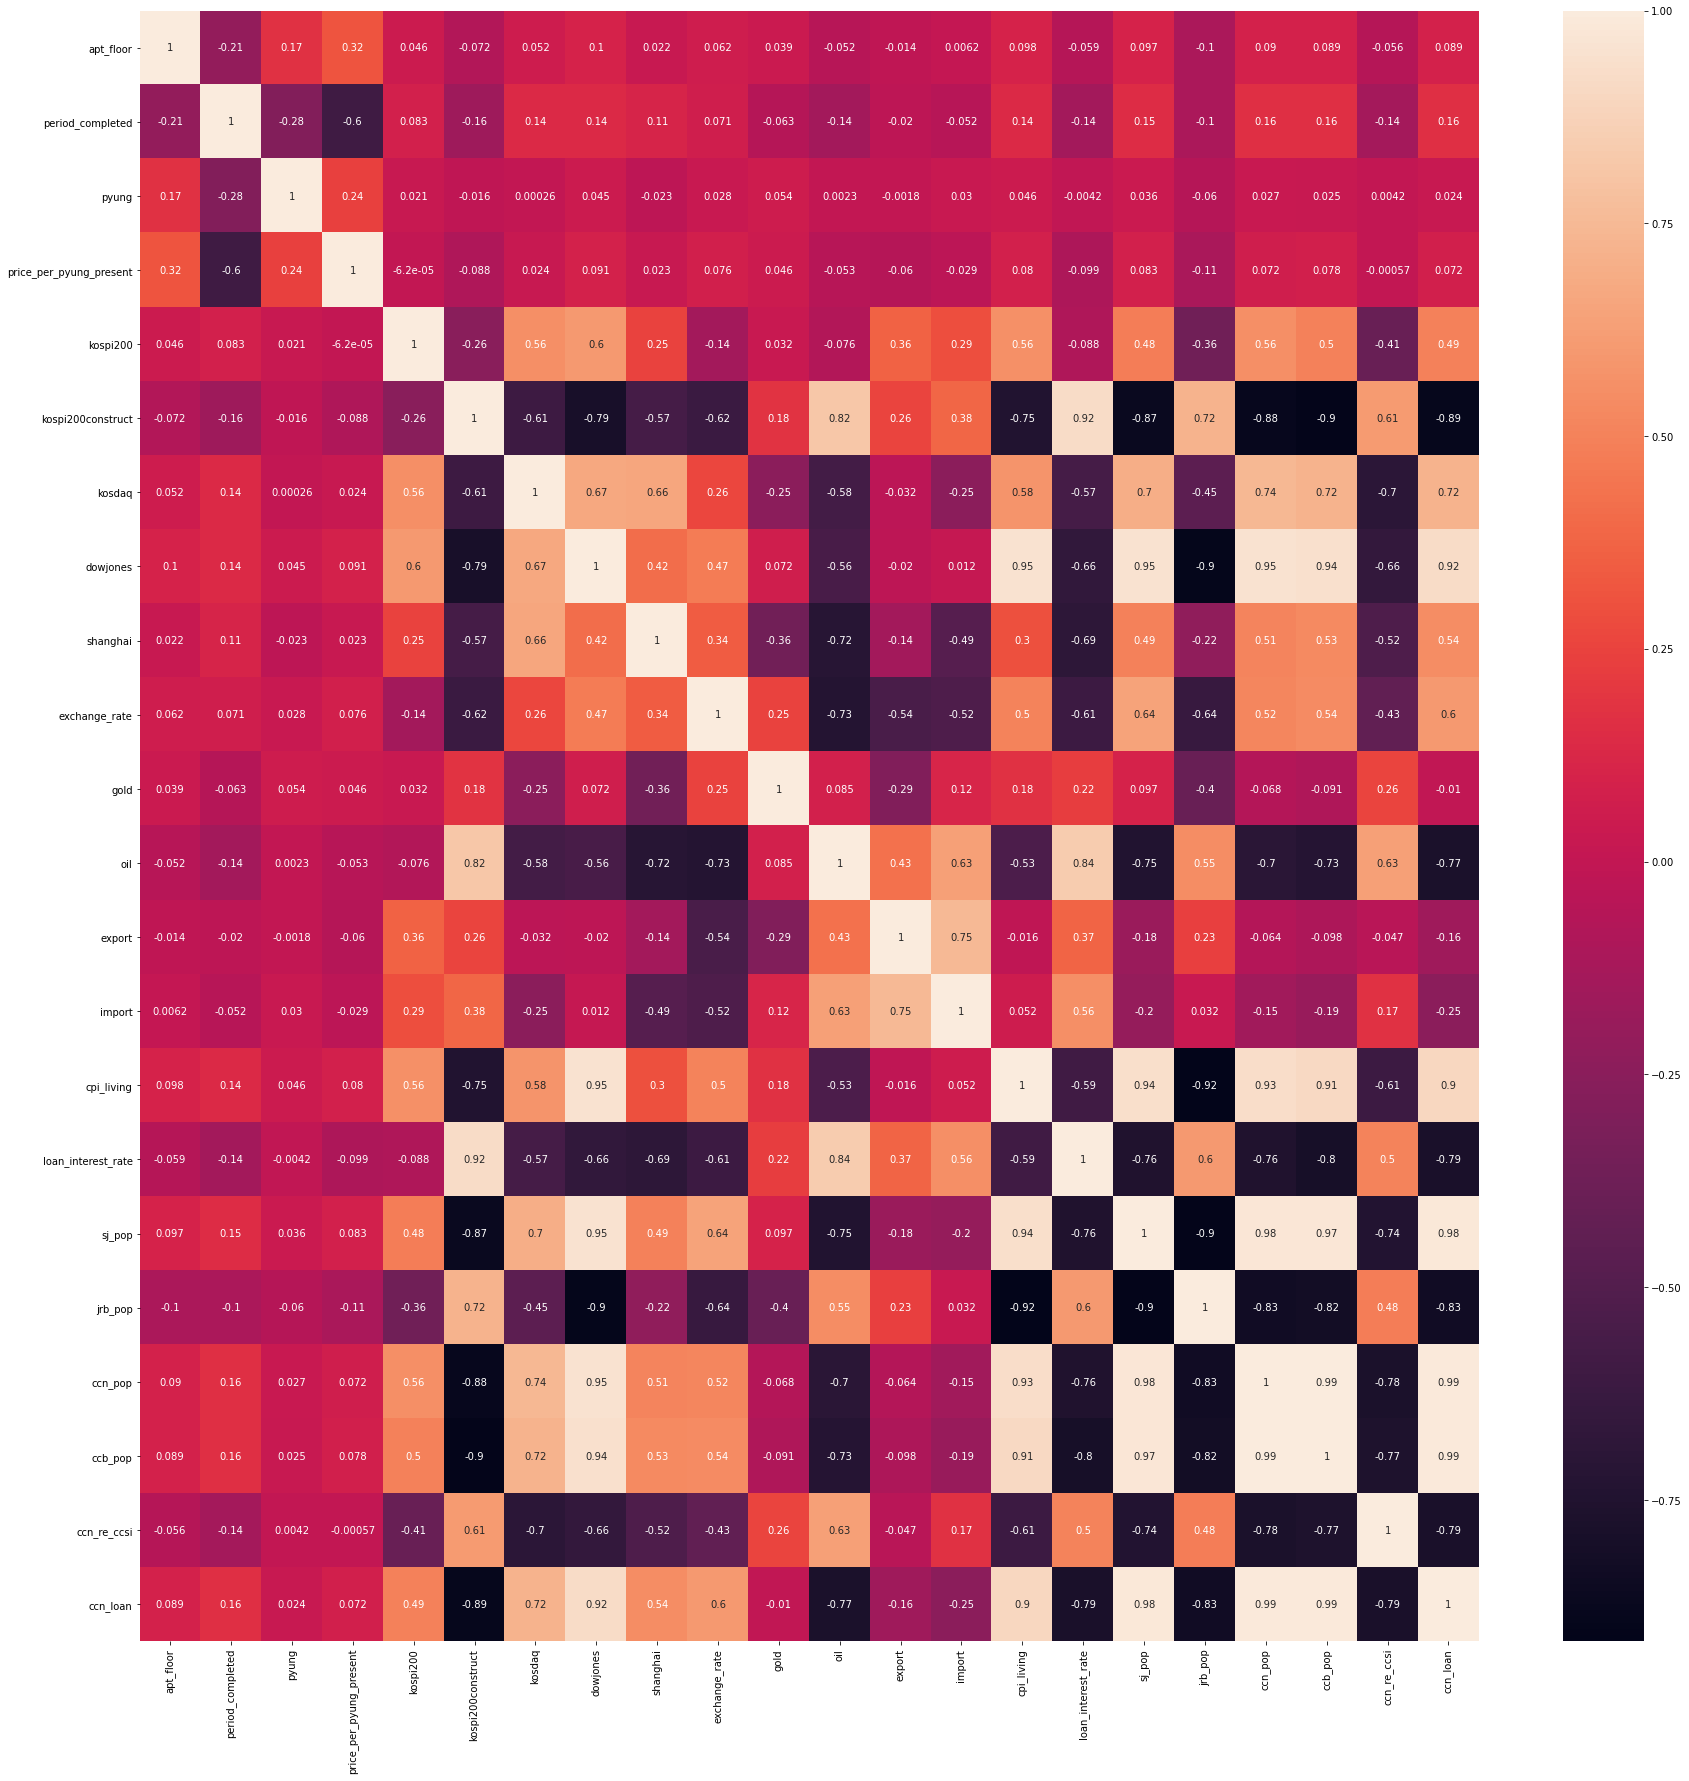

In [9]:
import seaborn as sns

plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True)
plt.show()


count    1.970430e+05
mean     7.413227e+06
std      2.960775e+06
min      5.456820e+05
25%      5.278769e+06
50%      7.146118e+06
75%      9.111275e+06
max      3.517186e+07
Name: price_per_pyung_present, dtype: float64


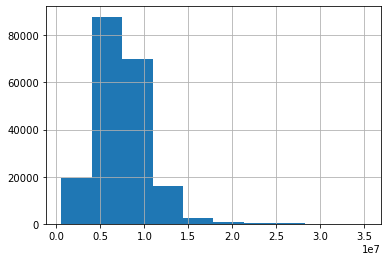

In [10]:
print(preD['price_per_pyung_present'].describe())

preD['price_per_pyung_present'].hist()
plt.show()

In [11]:
preD['price_cat'] = preD['price_per_pyung_present'] / 5.456820e+05  # min
print(preD['price_cat'].describe())

count    197043.000000
mean         13.585251
std           5.425825
min           1.000000
25%           9.673709
50%          13.095755
75%          16.697042
max          64.454871
Name: price_cat, dtype: float64


In [12]:
def calc_price_categorize(D):

    if D['price_cat'] < 9.673709 : # 25%
        D['price_cat'] = 1.0
    elif D['price_cat'] < 13.095755 : # 50%
        D['price_cat'] = 2.0
    elif D['price_cat'] < 16.697042 : # 75%
        D['price_cat'] = 3.0
    else:
        D['price_cat'] = 4.0

    return D
    
preD = preD.apply(calc_price_categorize, axis=1)
preD['price_cat'].value_counts()

2.0    49262
4.0    49261
3.0    49261
1.0    49259
Name: price_cat, dtype: int64

In [13]:
preD.to_csv(f'region-ml-data-files/{region_name}.csv', index=False, encoding='utf-8-sig')

## 기계 학습
1. price_cat 분포별 데이터 나누기
2. train_set, test_set 나누기
3. 스케일 조정
4. 모델별 학습, 테스트
5. 모델 최적화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

region_name = 'ccn_region'

In [2]:
readD = pd.read_csv(f'region-ml-data-files/{region_name}.csv')
readD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197043 entries, 0 to 197042
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region_sub               197043 non-null  object 
 1   apt_floor                197043 non-null  int64  
 2   period_completed         197043 non-null  int64  
 3   pyung                    197043 non-null  float64
 4   price_per_pyung_present  197043 non-null  float64
 5   kospi200                 197043 non-null  float64
 6   kospi200construct        197043 non-null  float64
 7   kosdaq                   197043 non-null  float64
 8   dowjones                 197043 non-null  float64
 9   shanghai                 197043 non-null  float64
 10  exchange_rate            197043 non-null  float64
 11  gold                     197043 non-null  float64
 12  oil                      197043 non-null  float64
 13  export                   197043 non-null  int64  
 14  impo

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_idx, test_idx in split.split(readD, readD["price_cat"]): # readD['price_cat'] 분포 유지
    train_set = readD.loc[train_idx]
    test_set = readD.loc[test_idx]

In [4]:
train_set['price_cat'].value_counts() / len(train_set)

4.0    0.250004
3.0    0.250004
2.0    0.250004
1.0    0.249989
Name: price_cat, dtype: float64

In [5]:
for set_ in (train_set, test_set):
    set_.drop('price_cat', axis=1, inplace=True)

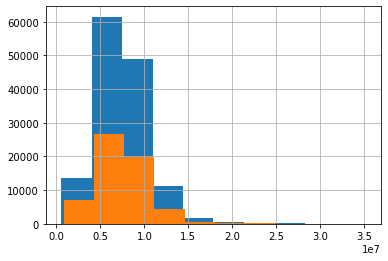

In [6]:
train_set['price_per_pyung_present'].hist()
test_set['price_per_pyung_present'].hist()
plt.show()

In [7]:
x_train = train_set.drop('price_per_pyung_present', axis=1)
y_train = train_set['price_per_pyung_present'].copy()
x_test =  test_set.drop('price_per_pyung_present', axis=1)
y_test = test_set['price_per_pyung_present'].copy()

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, x, y=None):
        return self
    
    def transform(self, x):
        return x[self.attribute_names].values

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor

num_pipe = Pipeline([
        ('selector', DataFrameSelector(list(x_train)[1:])),
        ('std_scaler', StandardScaler())
    ])

cat_pipe = Pipeline([
        ('selector', DataFrameSelector(['region_sub'])),
        ('cat_encoder', OneHotEncoder(sparse=False))
    ])

prepro_pipe = FeatureUnion([
        ("num_pipe", num_pipe),
        ("cat_pipe", cat_pipe)
    ])

full_pipe = Pipeline([
        ('prepro', prepro_pipe),
        ("gbr", GradientBoostingRegressor())
    ])

x_train_nor = prepro_pipe.fit_transform(x_train)
# x_test_nor = prepro_pipe.fit_transform(x_test)


In [10]:
x_train_nor[1, :]


array([-0.22956072,  0.91972897, -0.39844179, -1.48149716, -0.66565899,
        0.17820225, -0.72182551, -0.18982671,  2.0217221 , -0.64475257,
       -1.37098157, -2.39119578, -2.85828464, -0.44704189, -0.68785636,
        0.02019803,  0.54440614, -0.0631851 , -0.04399377, -1.03144117,
        0.08099417,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ])

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {'gbr__n_estimators': [900],
              'gbr__max_depth': [8]}

grid = GridSearchCV(full_pipe, param_grid=param_grid, cv=3)
grid.fit(x_train, y_train)

print("최상의 교차 검증 정확도: ", grid.best_score_)
print("테스트 세트 점수: ", grid.score(x_test, y_test))
print("최적의 매개변수: {}".format(grid.best_params_))

최상의 교차 검증 정확도:  0.9139974122106005
테스트 세트 점수:  0.9204768573723793
최적의 매개변수: {'gbr__max_depth': 8, 'gbr__n_estimators': 900}


In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

test_pred = grid.predict(x_test)
grid_mse = mean_squared_error(y_test, test_pred)
grid_rmse = np.sqrt(grid_mse)
print('grid rmse: ', grid_rmse)

grid_mae = mean_absolute_error(y_test, test_pred)
print('grid mae: ', grid_mae)

grid rmse:  828967.9771625104
grid mae:  525009.321227398


In [13]:
grid.cv_results_

{'mean_fit_time': array([528.11723844]),
 'std_fit_time': array([3.01933138]),
 'mean_score_time': array([1.33474024]),
 'std_score_time': array([0.02686609]),
 'param_gbr__max_depth': masked_array(data=[8],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_gbr__n_estimators': masked_array(data=[900],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'gbr__max_depth': 8, 'gbr__n_estimators': 900}],
 'split0_test_score': array([0.91442989]),
 'split1_test_score': array([0.91303392]),
 'split2_test_score': array([0.91452842]),
 'mean_test_score': array([0.91399741]),
 'std_test_score': array([0.00068248]),
 'rank_test_score': array([1])}

In [14]:
final_model = grid.best_estimator_
final_model

Pipeline(steps=[('prepro',
                 FeatureUnion(transformer_list=[('num_pipe',
                                                 Pipeline(steps=[('selector',
                                                                  DataFrameSelector(attribute_names=['apt_floor',
                                                                                                     'period_completed',
                                                                                                     'pyung',
                                                                                                     'kospi200',
                                                                                                     'kospi200construct',
                                                                                                     'kosdaq',
                                                                                                     'dowjones',
                              

In [15]:
import joblib

joblib.dump(final_model, f'models/{region_name}.pkl')


['models/ccn_region.pkl']

In [16]:
# test model
import joblib

gw_model = joblib.load(f'models/{region_name}.pkl')

test_pred = gw_model.predict(x_test)
grid_mse = mean_squared_error(y_test, test_pred)
grid_rmse = np.sqrt(grid_mse)
print('grid rmse: ', grid_rmse)

grid rmse:  828967.9771625104
